# 1. Метрики качества

## Матрица ошибок

Для того чтобы научится сравнивать алгоритмы между собой, нужны какие-то объективные метрики качества. Алгоритмы классификаций могут давать ошибочные ответы, однако эти ошибки могут быть разных видов. Удобно классифицировать различные случаи, как соотносятся между собой результат работы алгоритма и
истинный ответ, с помощью так называемой матрицы ошибок


|  | y = 1 | y = -1 |
| --- | --- | --- |
| a(x) = 1 | True Positive (TP) | False Positive (FP) |
| a(x) = -1 | False Negative (FN) | True Negative (TN)|

Когда алгоритм относит объект к классу +1, говорят, что алгоритм срабатывает. Если алгоритм сработал и объект действительно относится к классу +1, имеет место верное срабатывание (true positive), а если объект на самом деле относится к классу −1, имеет место ложное срабатывание (false positive).

Если алгоритм дает ответ −1, говорят, что он пропускает объект. Если имеет место пропуск объекта
класса +1, то это ложный пропуск (false negative). Если же алгоритм пропускает объект класса −1, имеет
место истинный пропуск (true negative)

Таким образом, существуют два вида ошибок: ложные срабатывания и ложные пропуски. Для каждого
из них нужна своя метрика качества, чтобы измерить, какое количество ошибок какого типа совершается.

## Точность (precision) и полнота (recall)
Пусть для примера рассматриваются две модели $a_1(x)$ и $a_2(x)$. Выборка состоит из 200 объектов, из которых
100 относятся к классу 1 и 100 — к классу −1.

Матрица ошибок первой модели

|  | y = 1 | y = -1 |
| --- | --- | --- |
| $a_1(x) = 1$ | 80 | 20 |
| $a_1(x) = -1$ | 20 | 80 |

Для второй модели

|  | y = 1 | y = -1 |
| --- | --- | --- |
| $a_2(x) = 1$ | 48 | 2 |
| $a_2(x) = -1$ | 52 | 98 |

Введем две метрики. Первая метрика, точность (precision), показывает, насколько можно доверять классификатору в случае срабатывания:
$$ precision (a, X) = \frac{TP}{TP+FP}$$
Вторая метрика, полнота (recall), показывает, на какой доле истинных объектов первого класса алгоритм срабатывает:
$$ recal (a,X) = \frac{TP}{TP+FN} $$

В примере выше точность и полнота первого алгоритма оказываются равными:
$precision(a_1, X) = 0.8$ $ reacll (a_1,X) = 0.8$

Вторая модель является очень точной, но в ущерб полноте:
$precision(a_2, X) = 0.96$ $ reacll (a_2,X) = 0.48$

## F-мера
В некоторых случаях хочется максимизировать и точность, и полноту одновременно. Встает вопрос об объединении этих двух метрик.

Единая метрика может быть получена как арифметическое среднее точности и полноты. Однако пусть есть константный алгоритм, точность которого равна 10%, а полнота 100 (работаем с выборкой, где всего 10% объектов нужного класса).  Очевидно, что этот алгоритм плохой, но введенная выше метрика для него равна 0.55. В свою очередь другой, гораздо более лучший алгоритм, с precision = 0.55 и recall = 55 также характеризуется таким же средним арифметическим.
Ситуация, когда константный и разумный алгоритмы могут лежать на одной линии, является недопустимой, поэтому следует искать другой способ построения единой метрики.

Чтобы констрантный и разумный алгоритмы не лежали на одной линии уровня, можно рассматривать $M = min(precision,recall) $
Но есть другой нюанс: два алгоритма, для которых точности одинаковы, но отличаются значения полноты, будут лежать на одной линии уровня.

«Сгладить» минимум можно с помощью гармонического среднего, или F-меры:
$$ F = \frac{2\cdot precision\cdot recall}{precision + recall}$$

Если необходимо отдать предпочтение точности или полноте, следует использовать расширенную F-меру, в которой есть параметр β:
$$ F = (1+\beta^2)\frac{2\cdot precision\cdot recall}{\beta^2precision + recall}$$
Например, при β = 0.5 важнее оказывается полнота, а в случае β = 2, наоборот, важнее оказывается точность

Тогда F-мера введенная ранее, является $F_1$-мерой, так как для нее β = 1

# 2. Дискриптивная статистика

In [3]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons
from sklearn import model_selection
from sklearn import metrics

%matplotlib inline

In [4]:
#Функция для изображения датасета
def plot_2d_dataset(data, colors):
    plt.scatter(list(map(lambda x: x[0], data[0])), list(map(lambda x: x[1], data[0])), c = data[1], cmap = colors)

In [5]:
moons = make_moons()

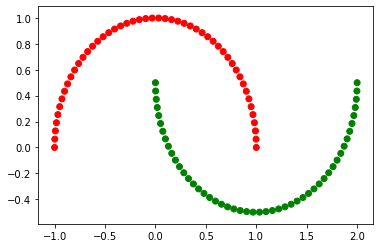

In [6]:
#Незашумленный датасет
colors = ListedColormap(['red', 'green'])

plot_2d_dataset (moons, colors)

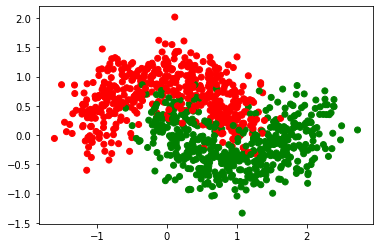

In [7]:
data = make_moons(1000, noise = 0.275)
X = data[0]
y = data[1]
plot_2d_dataset (data, colors)

# 3. Изучение классификаторов

Text(0.5, 1.0, 'actual distribution of test data')

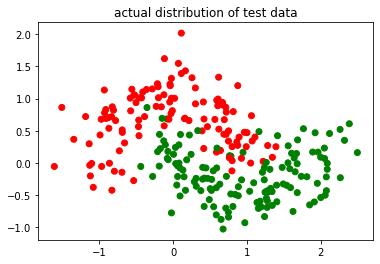

In [8]:
#разделение на обучающую и тестовую выборку
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(X, y, 
                                                                                    test_size = 0.25,
                                                                                    random_state = 1)

train_dataset = []
train_dataset.append(test_data)
train_dataset.append(test_labels)

plot_2d_dataset (train_dataset, colors)
plt.title ('actual distribution of test data')

## Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

C:\Users\Siga\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 1.0, 'predicted distribution')

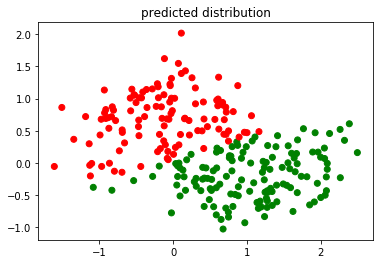

In [10]:
log_regressor = LogisticRegression(random_state = 1)
#обучение
log_regressor.fit(train_data, train_labels)

lr_predictions = log_regressor.predict(test_data)

log_predict_dataset = []
log_predict_dataset.append(test_data)
log_predict_dataset.append(lr_predictions)

plot_2d_dataset (log_predict_dataset, colors)
plt.title('predicted distribution')

In [11]:
print (metrics.classification_report(test_labels, lr_predictions))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       116
           1       0.85      0.86      0.86       134

    accuracy                           0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.84      0.84      0.84       250



## KNeighborsClassifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier

Text(0.5, 1.0, 'predicted distribution')

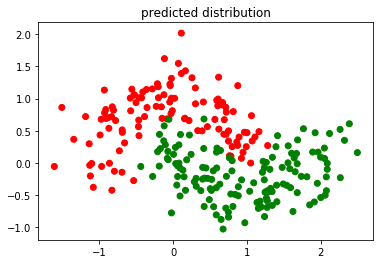

In [13]:
kn_classifier = KNeighborsClassifier()
#обучение
kn_classifier.fit(train_data, train_labels)

#предсказание
kn_predictions = kn_classifier.predict(test_data)

kn_predict_dataset = []
kn_predict_dataset.append(test_data)
kn_predict_dataset.append(kn_predictions)

plot_2d_dataset (kn_predict_dataset, colors)
plt.title('predicted distribution')

In [14]:
print (metrics.classification_report(test_labels, kn_predictions))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       116
           1       0.91      0.94      0.93       134

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



## DecisionTreeClassifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

Text(0.5, 1.0, 'predicted distribution')

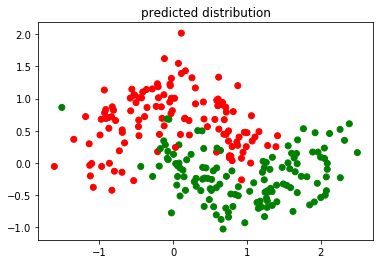

In [16]:
dt_classifier = DecisionTreeClassifier()
#обучение
dt_classifier.fit(train_data, train_labels)

#предсказание
dt_predictions = dt_classifier.predict(test_data)

dt_predict_dataset = []
dt_predict_dataset.append(test_data)
dt_predict_dataset.append(dt_predictions)

plot_2d_dataset (dt_predict_dataset, colors)
plt.title('predicted distribution')

In [17]:
print (metrics.classification_report(test_labels, dt_predictions))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       116
           1       0.94      0.90      0.92       134

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



## RandomForest

In [18]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\Siga\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(0.5, 1.0, 'predicted distribution')

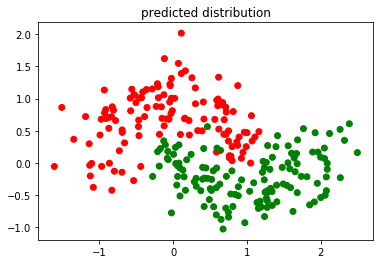

In [19]:
rf_classifier = RandomForestClassifier()
#обучение
rf_classifier.fit(train_data, train_labels)

#предсказание
rf_predictions = rf_classifier.predict(test_data)

rf_predict_dataset = []
rf_predict_dataset.append(test_data)
rf_predict_dataset.append(rf_predictions)

plot_2d_dataset (rf_predict_dataset, colors)
plt.title('predicted distribution')

In [23]:
print (metrics.classification_report(test_labels, rf_predictions))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       116
           1       0.94      0.91      0.92       134

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



## SVC

In [24]:
 from sklearn.svm import SVC

C:\Users\Siga\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5, 1.0, 'predicted distribution')

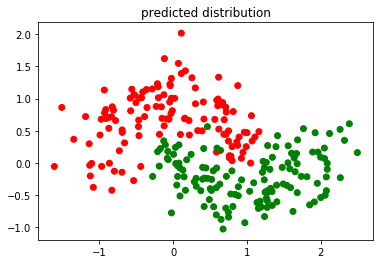

In [25]:
svc_classifier = SVC()
#обучение
svc_classifier.fit(train_data, train_labels)

#предсказание
svc_predictions = svc_classifier.predict(test_data)

svc_predict_dataset = []
svc_predict_dataset.append(test_data)
svc_predict_dataset.append(rf_predictions)

plot_2d_dataset (svc_predict_dataset, colors)
plt.title('predicted distribution')

# Все графики вместе

In [ ]:
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=3, figsize=(20, 10))

ax1[0].scatter(list(map(lambda x: x[0], test_data)), list(map(lambda x: x[1], test_data)), c = test_labels, cmap = colors)
ax1[0].set_title ('Actual distribution')

ax1[1].scatter(list(map(lambda x: x[0], test_data)), list(map(lambda x: x[1], test_data)), c = lr_predictions , cmap = colors)
ax1[1].set_title ('Logistic regression')

ax1[2].scatter(list(map(lambda x: x[0], test_data)), list(map(lambda x: x[1], test_data)), c = kn_predictions , cmap = colors)
ax1[2].set_title ('KNeighborsClassifier')

ax2[0].scatter(list(map(lambda x: x[0], test_data)), list(map(lambda x: x[1], test_data)), c = dt_predictions , cmap = colors)
ax2[0].set_title ('DecisionTreeClassifier')

ax2[1].scatter(list(map(lambda x: x[0], test_data)), list(map(lambda x: x[1], test_data)), c = rf_predictions , cmap = colors)
ax2[1].set_title ('RandomForest')

ax2[2].scatter(list(map(lambda x: x[0], test_data)), list(map(lambda x: x[1], test_data)), c = svc_predictions , cmap = colors)
ax2[2].set_title ('SVC')

Text(0.5, 1.0, 'SVC')